In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


In [6]:
df=pd.read_csv("C:\\Users\\Shruti Udagire\\Supervised_Categorical\\Files\\US_Heart_Patients.csv")
df=df.sample(frac=1,random_state=3)
#if any sort of sorting is done on data we want shuffle the data here 1 means 100 percent or all
# hence it is not becomes while splitting 

In [7]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3546,0,54,1.0,0,0.0,0.0,0,0,0,241.0,106.0,77.0,27.64,78.0,74.0,0
1127,0,42,3.0,1,10.0,0.0,0,0,0,253.0,109.0,74.0,24.38,88.0,60.0,0
3088,0,58,1.0,0,0.0,1.0,1,1,0,274.0,159.0,90.0,28.40,72.0,81.0,0
437,1,45,1.0,1,30.0,0.0,0,0,0,240.0,141.0,89.0,25.01,95.0,76.0,0
3188,1,63,1.0,0,0.0,0.0,0,1,0,190.0,148.0,90.0,27.13,72.0,86.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,63,1.0,0,0.0,0.0,0,1,0,260.0,159.5,91.0,27.01,68.0,66.0,0
968,0,54,1.0,0,0.0,0.0,0,1,0,266.0,137.0,88.0,29.76,80.0,80.0,0
1667,0,56,1.0,1,3.0,0.0,0,1,0,285.0,145.0,100.0,30.14,80.0,86.0,0
3321,0,58,2.0,0,0.0,0.0,0,1,1,265.0,143.5,85.0,21.68,91.0,107.0,0


In [8]:
df['TenYearCHD'].value_counts()

0    3596
1     644
Name: TenYearCHD, dtype: int64

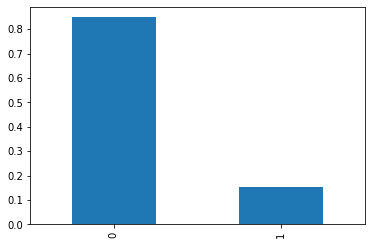

In [9]:
#normalize gives u proportion
df['TenYearCHD'].value_counts(normalize=True).plot(kind='bar')

In [10]:
#display only features that are missing
# df.isnull().sum()
ms=df.isnull().sum()
ms[ms>0]

education     105
cigsPerDay     29
BPMeds         53
totChol        50
BMI            19
heartRate       1
glucose       388
dtype: int64

6.214948349534676

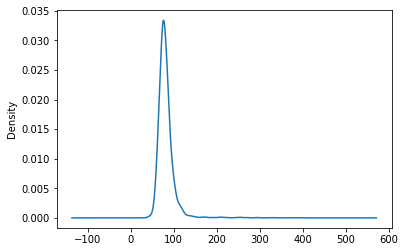

In [11]:
#befor imputation
df['glucose'].plot(kind='kde')
df['glucose'].skew()

In [12]:
# #aftr imputation
# df['glucose']=df['glucose'].fillna(df['glucose'].median())
# df['glucose'].plot(kind='kde')
# df['glucose'].skew()

In [13]:
df=df.fillna(method='ffill')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4240 entries, 3546 to 1688
Data columns (total 16 columns):
male               4240 non-null int64
age                4240 non-null int64
education          4240 non-null float64
currentSmoker      4240 non-null int64
cigsPerDay         4240 non-null float64
BPMeds             4240 non-null float64
prevalentStroke    4240 non-null int64
prevalentHyp       4240 non-null int64
diabetes           4240 non-null int64
totChol            4240 non-null float64
sysBP              4240 non-null float64
diaBP              4240 non-null float64
BMI                4240 non-null float64
heartRate          4240 non-null float64
glucose            4240 non-null float64
TenYearCHD         4240 non-null int64
dtypes: float64(9), int64(7)
memory usage: 563.1 KB


In [15]:
#sns.pairplot(df,hue='TenYearCHD')

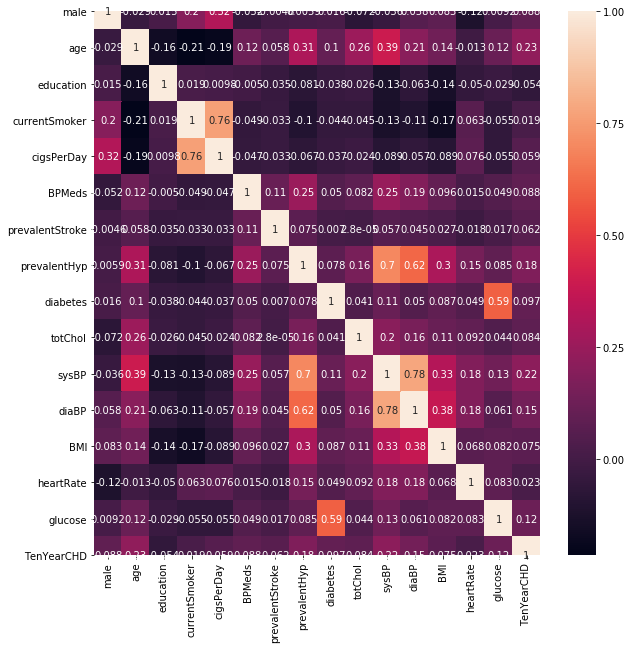

In [16]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)

In [17]:
import plusmodules as pm

<Figure size 720x360 with 0 Axes>

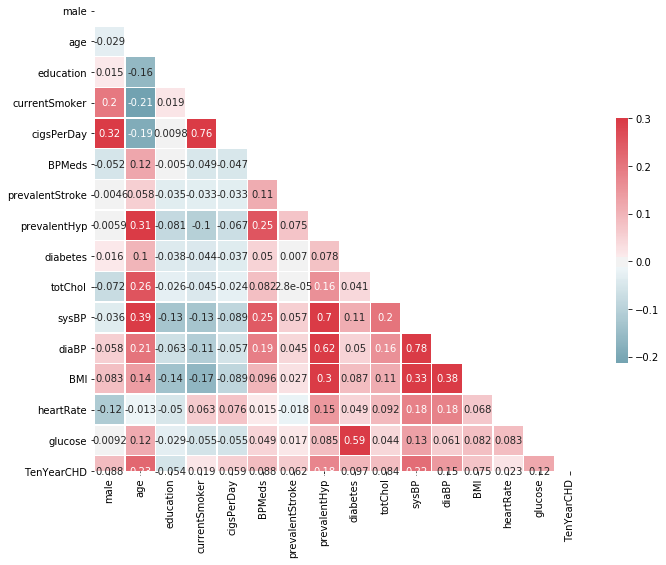

In [18]:
plt.figure(figsize=(10,5))
pm.corr_matrix(df)

In [232]:
#Here as TenYearCHD is a categorical variable so correlation with othervariable doesnt mean anything imp.
#So it does give us idea about multicollinearity between independent variable

['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']


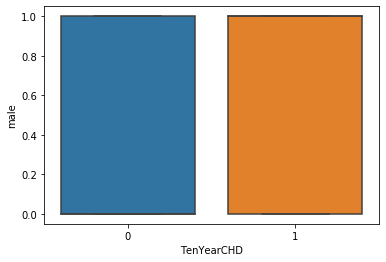

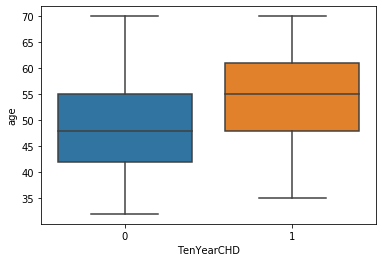

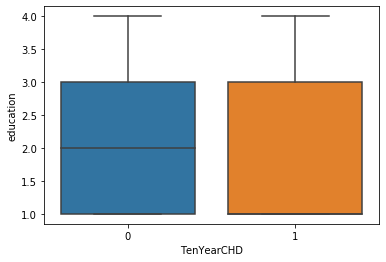

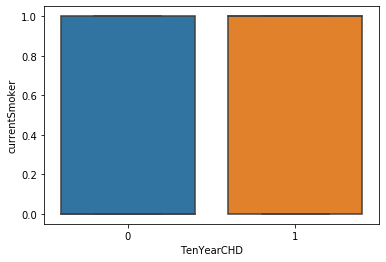

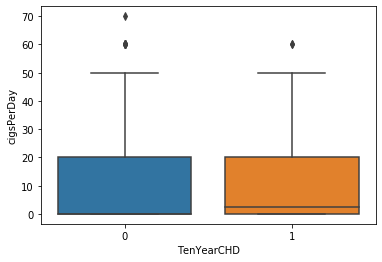

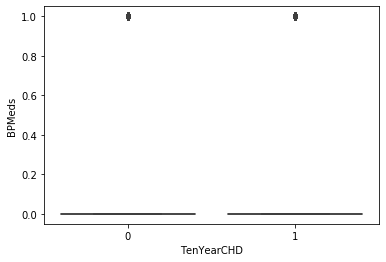

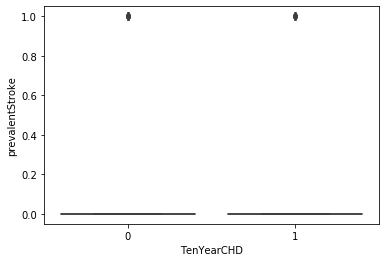

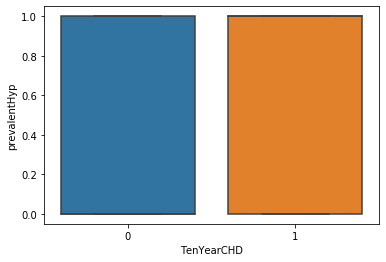

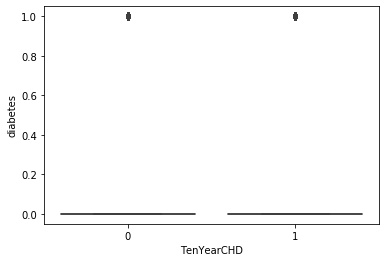

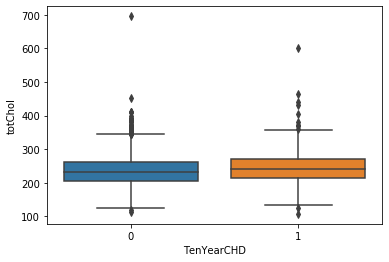

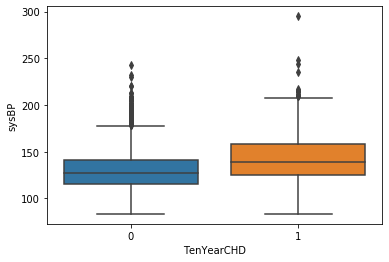

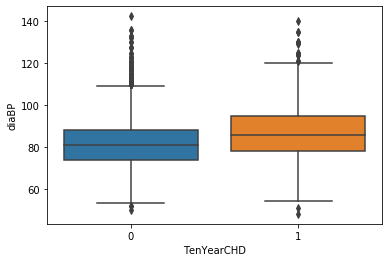

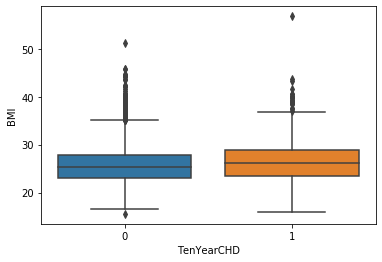

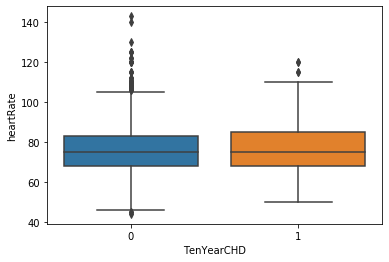

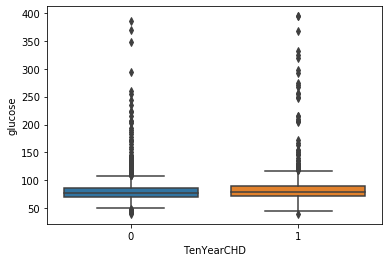

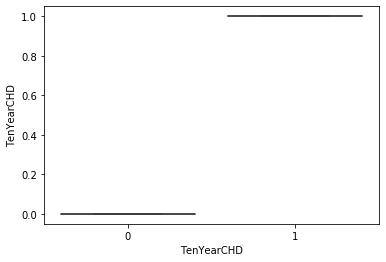

In [19]:
#Barplot
cols=list(df.columns)
print(cols)
for i in cols:
    sns.boxplot(x=df['TenYearCHD'],y=df[i])
    plt.show()

In [20]:
df0=df[df['TenYearCHD']==0]
df1=df[df['TenYearCHD']==1]

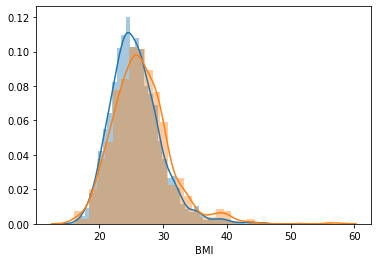

In [21]:
sns.distplot(df0['BMI'])
sns.distplot(df1['BMI'])

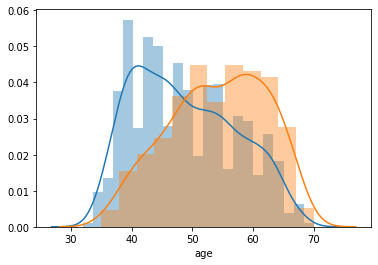

In [22]:
sns.distplot(df0['age'])
sns.distplot(df1['age'])

In [23]:

X=df.drop('TenYearCHD',axis=1)
Y=df['TenYearCHD']
X_constant=sm.add_constant(X)

C:\Users\Shruti Udagire\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
for i in zip(X_constant.columns,[variance_inflation_factor(X_constant.values,j) for j in range (0,X_constant.shape[1])]):
    print(i)

('const', 197.7038256912043)
('male', 1.1974150711540141)
('age', 1.368622539322647)
('education', 1.0527722387318033)
('currentSmoker', 2.4903587069410293)
('cigsPerDay', 2.6184252189419577)
('BPMeds', 1.0972852682411283)
('prevalentStroke', 1.0187975715499797)
('prevalentHyp', 2.0506021654743796)
('diabetes', 1.5515884973979606)
('totChol', 1.104573499499832)
('sysBP', 3.733003433169125)
('diaBP', 2.9619126436479783)
('BMI', 1.234954958220326)
('heartRate', 1.0954422832832835)
('glucose', 1.5694478183214517)


# Building Logistic Regression Model

In [25]:
model=sm.Logit(Y,X_constant,random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4224
Method:                           MLE   Df Model:                           15
Date:                Sat, 07 Mar 2020   Pseudo R-squ.:                  0.1117
Time:                        18:09:31   Log-Likelihood:                -1604.3
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 1.189e-76
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.1133      0.664    -12.224      0.000      -9.414      -6.812
male                0.5068      0.101      5.043      0.000       0.310       0.704
age                 0.0619      0.006      9.960      0.000       0.050       0.074
education          -0.0168      0.046     -0.368      0.713      -0.106       0.072
currentSmoker       0.0136      0.144      0.094      0.925      -0.268       0.295
cigsPerDay          0.0212      0.006      3.736      0.000       0.010       0.032
BPMeds              0.2668      0.217      1.227      0.220      -0.160       0.693
prevalentStroke     0.9610      0.442      2.175      0.030       0.095       1.827
prevalentHyp        0.2298      0.128      1.789      0.074      -0.022       0.482
diabetes            0.2171      0.290      0.748      0.454      -0.352       0.786
totChol             0.0021      0.001      2.030      0.042    7.15e-05       0.004
sysBP               0.0141      0.004      3.984      0.000       0.007       0.021
diaBP              -0.0029      0.006     -0.492      0.623      -0.015       0.009
BMI                 0.0028      0.012      0.239      0.811      -0.020       0.026
heartRate          -0.0015      0.004     -0.397      0.691      -0.009       0.006
glucose             0.0064      0.002      3.077      0.002       0.002       0.011
===================================================================================
"""

In [ ]:
#coefficients are log of odds
# P value tell which are significant feature pvalue is less tah is significant


H0:Coeff of age =0
age has no significance on CHD
H1:Coeff of age !=0
Age has some  significance on CHD

pvalue<0.05
Reject H0


In [27]:
p=model.pvalues
cls=list(X_constant.columns)
while len(cls)>1:
    X_1=X_constant[cls]
    model=sm.Logit(Y,X_1).fit()
    p=model.pvalues
    max_p=max(p)
    feature_maxp=p.idxmax()
    if max_p>0.05:
        print('\n')
        print('column removed: ',feature_maxp,' prob: ',max_p)
        cls.remove(feature_maxp)
    else:
        break
cls

Optimization terminated successfully.
         Current function value: 0.378369
         Iterations 7


column removed:  currentSmoker  prob:  0.9248067145320604
Optimization terminated successfully.
         Current function value: 0.378370
         Iterations 7


column removed:  BMI  prob:  0.8183474351558162
Optimization terminated successfully.
         Current function value: 0.378376
         Iterations 7


column removed:  heartRate  prob:  0.6936547572101264
Optimization terminated successfully.
         Current function value: 0.378395
         Iterations 7


column removed:  education  prob:  0.7021584464005117
Optimization terminated successfully.
         Current function value: 0.378412
         Iterations 7


column removed:  diaBP  prob:  0.6177168524266301
Optimization terminated successfully.
         Current function value: 0.378441
         Iterations 7


column removed:  diabetes  prob:  0.430019871794435
Optimization terminated successfully.
         Current funct

['const',
 'male',
 'age',
 'cigsPerDay',
 'prevalentStroke',
 'totChol',
 'sysBP',
 'glucose']

In [28]:

model=sm.Logit(Y,X_constant[cls],random_state=3).fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.379099
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 4240
Model:                          Logit   Df Residuals:                     4232
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Mar 2020   Pseudo R-squ.:                  0.1100
Time:                        18:44:21   Log-Likelihood:                -1607.4
converged:                       True   LL-Null:                       -1806.1
Covariance Type:            nonrobust   LLR p-value:                 8.410e-82
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.8484      0.438    -20.220      0.000      -9.706      -7.991
male                0.5096      0.098      5.184      0.000       0.317       0.702
age                 0.0635      0.006     10.632      0.000       0.052       0.075
cigsPerDay          0.0212      0.004      5.510      0.000       0.014       0.029
prevalentStroke     1.0675      0.437      2.443      0.015       0.211       1.924
totChol             0.0021      0.001      2.081      0.037       0.000       0.004
sysBP               0.0167      0.002      8.299      0.000       0.013       0.021
glucose             0.0074      0.002      4.579      0.000       0.004       0.011
===================================================================================
"""

In [242]:
#model.params give coefficient and we taking exponential
# exponential are needed to do interpretation
exp_b=np.exp(model.params)
exp_b=pd.DataFrame({'coef':model.params,'Exp_coeff':np.exp(model.params)})
exp_b

,coef,Exp_coeff
const,-8.848368,0.000144
male,0.509623,1.664664
age,0.063459,1.065516
cigsPerDay,0.021153,1.021378
prevalentStroke,1.067451,2.907957
totChol,0.002113,1.002115
sysBP,0.016687,1.016827
glucose,0.007373,1.007400


# Age

In [ ]:
1.Positive sign of age indicates that probability of CHD increases with Age
2.Increase in age by one year causes log(odds) of chd increaes by 0.0635
3.Increase in age by one year causes (1-1.065516) 6% increase in odds(CHD)

# MALE

In [ ]:
# as male is dummy variable base will be female
1.Positive sign of male coefficient indicates that male gender is more prome to CHD compared to female
2.Log(odds) of chd in male is higher by  0.509623 than female
3.Odds(CHD) of male is 66% higher than compared to female

In [243]:
X_prob=X_constant[cls]
X_prob['y']=Y.values

C:\Users\Shruti Udagire\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [244]:
X_prob.head()

,const,male,age,cigsPerDay,prevalentStroke,totChol,sysBP,glucose,y
3546,1.0,0,54,0.0,0,241.0,106.0,74.0,0
1127,1.0,0,42,10.0,0,253.0,109.0,60.0,0
3088,1.0,0,58,0.0,1,274.0,159.0,81.0,0
437,1.0,1,45,30.0,0,240.0,141.0,76.0,0
3188,1.0,1,63,0.0,0,190.0,148.0,86.0,0


In [248]:
X_prob.to_csv("X_prob.csv")

In [251]:
prob=model.predict(X_constant[cls])

In [252]:
prob

3546    0.069264
1127    0.040086
3088    0.432654
437     0.193365
3188    0.302438
          ...   
789     0.344482
968     0.120925
1667    0.171440
3321    0.193964
1688    0.038748
Length: 4240, dtype: float64

In [253]:
prob=pd.DataFrame(prob,columns=['Prob'])
prob.head()

,Prob
3546,0.069264
1127,0.040086
3088,0.432654
437,0.193365
3188,0.302438


In [254]:
prob['y_est']=prob['Prob'].apply(lambda x:1 if x>=0.5 else 0)

In [255]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y,prob['y_est'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [256]:
prob['y']=Y.values

In [257]:
prob.head(5)

,Prob,y_est,y
3546,0.069264,0,0
1127,0.040086,0,0
3088,0.432654,0,0
437,0.193365,0,0
3188,0.302438,0,0


In [259]:
df0=prob[prob['y']==0]
df1=prob[prob['y']==1]

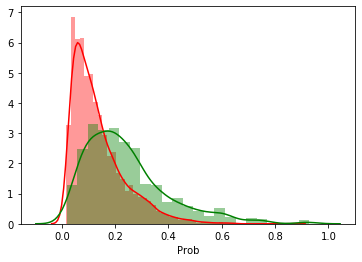

In [260]:
sns.distplot(df0['Prob'],color='r')
sns.distplot(df1['Prob'],color='g')

# Classification model 

In [261]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [262]:
confusion_matrix(prob['y'],prob['y_est'])

array([[3573,   23],
       [ 595,   49]], dtype=int64)

In [263]:
# Accuracy score can sometimes be misleading due to skewness in data
accuracy_score(prob['y'],prob['y_est'])

0.8542452830188679

# ROC ANALYSIS

In [264]:
from sklearn.metrics import roc_auc_score,roc_curve

In [265]:
print('AUC value of the model',roc_auc_score(prob['y'],prob['Prob']))

AUC value of the model 0.7304199282847056


In [266]:
fpr,tpr,threasholds=roc_curve(prob['y'],prob['Prob'])

In [267]:
threasholds[0]=threasholds[0]-1

In [268]:
threasholds

array([0.92865961, 0.92865961, 0.91312889, 0.85807079, 0.64451403,
       0.64416086, 0.64309831, 0.63692876, 0.62076474, 0.61888853,
       0.60102884, 0.59273286, 0.5770012 , 0.57610607, 0.56445639,
       0.56020808, 0.55728264, 0.55126303, 0.54849605, 0.54828537,
       0.54341342, 0.53974452, 0.5349244 , 0.53000139, 0.52883151,
       0.52733388, 0.52427393, 0.52388946, 0.51400158, 0.51330848,
       0.51019049, 0.49846189, 0.49116721, 0.48931525, 0.4872395 ,
       0.47831579, 0.47723031, 0.47321536, 0.46956079, 0.46852073,
       0.46553847, 0.4592962 , 0.458117  , 0.4555332 , 0.45126052,
       0.44956977, 0.44915032, 0.44740178, 0.44606112, 0.4384331 ,
       0.43737703, 0.43691176, 0.43508574, 0.43408986, 0.4330541 ,
       0.43265376, 0.43102807, 0.43008087, 0.43000903, 0.42957085,
       0.42936337, 0.42630178, 0.42528352, 0.42355043, 0.42345092,
       0.4234059 , 0.42331062, 0.42172468, 0.42110502, 0.42061139,
       0.42032199, 0.41772335, 0.41750821, 0.41465187, 0.41385

In [269]:
roc=pd.DataFrame({'fpr':fpr,'tpr':tpr,'thresholds':threasholds})

In [270]:
roc.tail()

,fpr,tpr,thresholds
975,0.998888,0.996894,0.018324
976,0.998888,0.998447,0.018137
977,0.999166,0.998447,0.017470
978,0.999166,1.000000,0.017444
979,1.000000,1.000000,0.016150


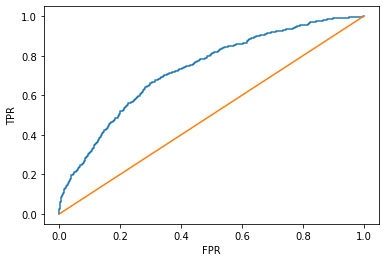

In [271]:
plt.plot(fpr,tpr)
plt.xlabel('FPR')
plt.ylabel('TPR')
# below for diagonal line which is worst model
plt.plot(fpr,fpr)

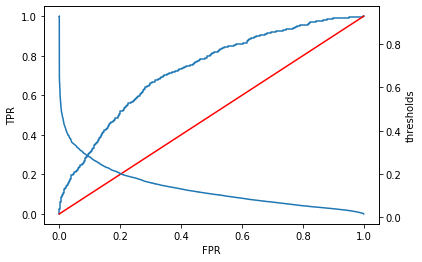

In [272]:
fig,ax=plt.subplots()
ax.plot(fpr,tpr)
ax.plot(fpr,fpr,'r')
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax1=ax.twinx()
ax1.set_ylabel('thresholds')
ax1.plot(fpr,threasholds)

In [ ]:
roc[(roc['tpr']>=0.79) & (roc['tpr']<=0.81) ]